In [ ]:
#THE DATASET WAS SEGREGATED BETWEEN EXPERTS AND MODEL TESTING IS PERFORMED FOR ONE OF THOSE EXPERT DATA

In [ ]:
# LABEL COLUMN = "diagnosis"
# FEATURE USED = "MFCC"

In [1]:
!unzip /content/drive/MyDrive/expert_seg_coughvid/expert_segregated.zip > /dev/null

In [2]:
import pandas as pd
import os
import numpy as np
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
cough_audio_data_path = "/content/expert_segregated/audio_files/expert1"

In [4]:
features_path = "/content/expert_segregated/expert_1.csv"

In [5]:
import pandas as pd
df = pd.read_csv(features_path)
df.head()

,Unnamed: 0.1,Unnamed: 0,uuid,cough_detected,age,gender,quality_1,cough_type_1,dyspnea_1,wheezing_1,stridor_1,choking_1,congestion_1,nothing_1,diagnosis_1,severity_1
0,266,266,01ff40e8-63e6-4570-a463-9778ea30cad7,0.9686,24.0,other,poor,dry,False,False,False,False,False,True,healthy_cough,pseudocough
1,476,476,0379c586-c500-483c-83a6-95b63afe6931,0.9916,63.0,male,ok,dry,False,False,False,False,False,True,healthy_cough,pseudocough
2,483,483,038592cb-c8db-4f55-8052-e20059146cb5,0.9824,28.0,male,ok,dry,False,False,False,False,False,True,COVID-19,mild
3,513,513,03c33278-ad87-4a37-bf8f-3b1fdf69ecfd,0.9746,25.0,male,ok,dry,False,False,False,False,False,True,healthy_cough,pseudocough
4,686,686,052fc88d-aa01-4422-85fd-f0ddebb8bd95,0.9584,24.0,male,good,unknown,False,False,False,False,False,True,healthy_cough,pseudocough


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0.1    536 non-null    int64  
 1   Unnamed: 0      536 non-null    int64  
 2   uuid            536 non-null    object 
 3   cough_detected  536 non-null    float64
 4   age             536 non-null    float64
 5   gender          536 non-null    object 
 6   quality_1       536 non-null    object 
 7   cough_type_1    536 non-null    object 
 8   dyspnea_1       536 non-null    bool   
 9   wheezing_1      536 non-null    bool   
 10  stridor_1       536 non-null    bool   
 11  choking_1       536 non-null    bool   
 12  congestion_1    536 non-null    bool   
 13  nothing_1       536 non-null    bool   
 14  diagnosis_1     536 non-null    object 
 15  severity_1      536 non-null    object 
dtypes: bool(6), float64(2), int64(2), object(6)
memory usage: 45.1+ KB


In [7]:
label_column = "diagnosis_1"

In [8]:
df[label_column].value_counts()

COVID-19               186
lower_infection        164
healthy_cough          157
upper_infection         17
obstructive_disease     12
Name: diagnosis_1, dtype: int64

In [9]:
#df.drop(df.loc[df[label_column]=="unknown"].index, inplace=True)

In [10]:
df[label_column].value_counts()

COVID-19               186
lower_infection        164
healthy_cough          157
upper_infection         17
obstructive_disease     12
Name: diagnosis_1, dtype: int64

In [11]:
df[label_column] = df[label_column].fillna("")
df.drop(df.loc[df[label_column]==""].index, inplace=True)

In [12]:
len(df)

536

In [13]:
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name)

    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=16)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    #mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_fft=2048, hop_length=512, n_mels=16)
    #mel_scaled_features = np.mean(mel_spectrogram.T,axis=0)

    return mfccs_scaled_features #mel_scaled_features

In [14]:
import numpy as np
from tqdm import tqdm
extracted_features=[]
for index_num,row in tqdm(df.iterrows()):
    file_name = os.path.join(cough_audio_data_path,str(row["uuid"])+".wav")
    final_class_labels=row[label_column]
    mfcc = features_extractor(file_name)
    extracted_features.append([mfcc[0],mfcc[1],mfcc[2],mfcc[3],mfcc[4],mfcc[5],mfcc[6],mfcc[7],mfcc[8],\
                               mfcc[9],mfcc[10],mfcc[11],mfcc[12],mfcc[13],mfcc[14],mfcc[15],final_class_labels])

536it [00:41, 13.02it/s]


In [22]:
### converting extracted_features to Pandas dataframe
extracted_features_df = pd.DataFrame(extracted_features,columns=['mfcc1','mfcc2','mfcc3','mfcc4','mfcc5',\
                                                                 'mfcc6','mfcc7','mfcc8','mfcc9','mfcc10',\
                                                                 'mfcc11','mfcc12','mfcc13','mfcc14','mfcc15',\
                                                                 'mfcc16','diagnosis'])
extracted_features_df.head(10)

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,diagnosis
0,-452.610626,22.148582,-26.667784,14.294965,-11.275042,-4.616519,-9.429002,-5.581970,-4.823736,-1.983881,-3.111674,-2.568714,2.865866,-2.826376,-0.517783,-1.794053,healthy_cough
1,-490.407593,46.116169,-10.762878,1.874184,2.817583,0.592210,-6.708392,-6.129557,-3.375265,-3.202446,-2.241224,-3.299662,-0.895146,-3.855475,-3.636161,-2.962979,healthy_cough
2,-372.411011,70.084167,-6.788613,15.035032,-22.363907,30.576426,-29.808424,-7.844227,-10.131979,-9.631707,-12.262403,-9.298244,0.367706,-8.707373,-2.383633,-10.243588,COVID-19
3,-488.158783,17.670715,-1.707415,4.580669,-12.120718,2.679798,-3.528488,-1.293560,-1.336645,-2.632636,-2.568296,-3.983283,-1.052278,-1.877194,0.617954,-2.027632,healthy_cough
4,-464.470673,33.050476,-13.767201,-2.279912,-5.500866,1.203839,-3.512835,-5.580782,0.718663,1.615429,-1.038447,-1.823261,0.998890,-4.956551,-2.084817,1.051466,healthy_cough
5,-362.948792,84.380951,-11.178397,15.096953,-11.204391,19.508633,-17.514425,-5.176837,-3.604428,-0.125655,-6.218757,-8.481205,0.745885,-8.165537,-1.251658,-5.722466,lower_infection
6,-395.087769,26.691139,-32.797588,16.642145,-20.226688,10.775096,-18.641010,-1.084363,-10.498213,5.987441,-6.622977,-6.752926,8.069510,-5.737794,0.515015,-6.846289,COVID-19
7,-456.925537,30.051725,-30.964863,10.734370,-15.597851,-1.865135,-12.809937,-4.630316,-7.836185,-1.874367,2.299214,-2.037802,3.219961,-4.642745,-1.942671,-3.222625,healthy_cough
8,-493.485809,33.047775,-19.147179,7.221704,-5.264141,3.671988,-6.212891,-9.143614,-10.121635,-7.436742,1.027973,-3.991179,-1.447711,-1.472789,-3.808407,2.247574,lower_infection
9,-289.757080,65.376740,-66.443779,24.583017,-34.964417,-0.588329,-30.036140,-11.794497,-8.880341,6.753240,-5.219612,-1.122847,2.517980,-9.703594,2.100335,-10.021289,COVID-19


In [23]:
extracted_features_df.shape

(536, 17)

In [24]:
extracted_features_df["diagnosis"].value_counts()

COVID-19               186
lower_infection        164
healthy_cough          157
upper_infection         17
obstructive_disease     12
Name: diagnosis, dtype: int64

In [18]:
#extracted_features_df.drop(extracted_features_df.loc[extracted_features_df['diagnosis']=="upper_infection"].index, inplace=True)

In [19]:
#extracted_features_df.drop(extracted_features_df.loc[extracted_features_df['diagnosis']=="obstructive_disease"].index, inplace=True)

In [25]:
extracted_features_df["diagnosis"].value_counts()

COVID-19               186
lower_infection        164
healthy_cough          157
upper_infection         17
obstructive_disease     12
Name: diagnosis, dtype: int64

In [27]:
#severity_label_map = {"mild":0, "pseudocough": 1, "severe": 1}
#severity_label_map = {"mild":0, "severe": 1}
#severity_label_map = {"COVID-19":0, "lower_infection": 1, "healthy_cough": 2}
severity_label_map = {"COVID-19":0, "lower_infection": 1, "healthy_cough": 2, 'upper_infection': 3, 'obstructive_disease': 4}
extracted_features_df = extracted_features_df.replace({"diagnosis": severity_label_map})

In [28]:
extracted_features_df["diagnosis"].value_counts()

0    186
1    164
2    157
3     17
4     12
Name: diagnosis, dtype: int64

<Axes: >

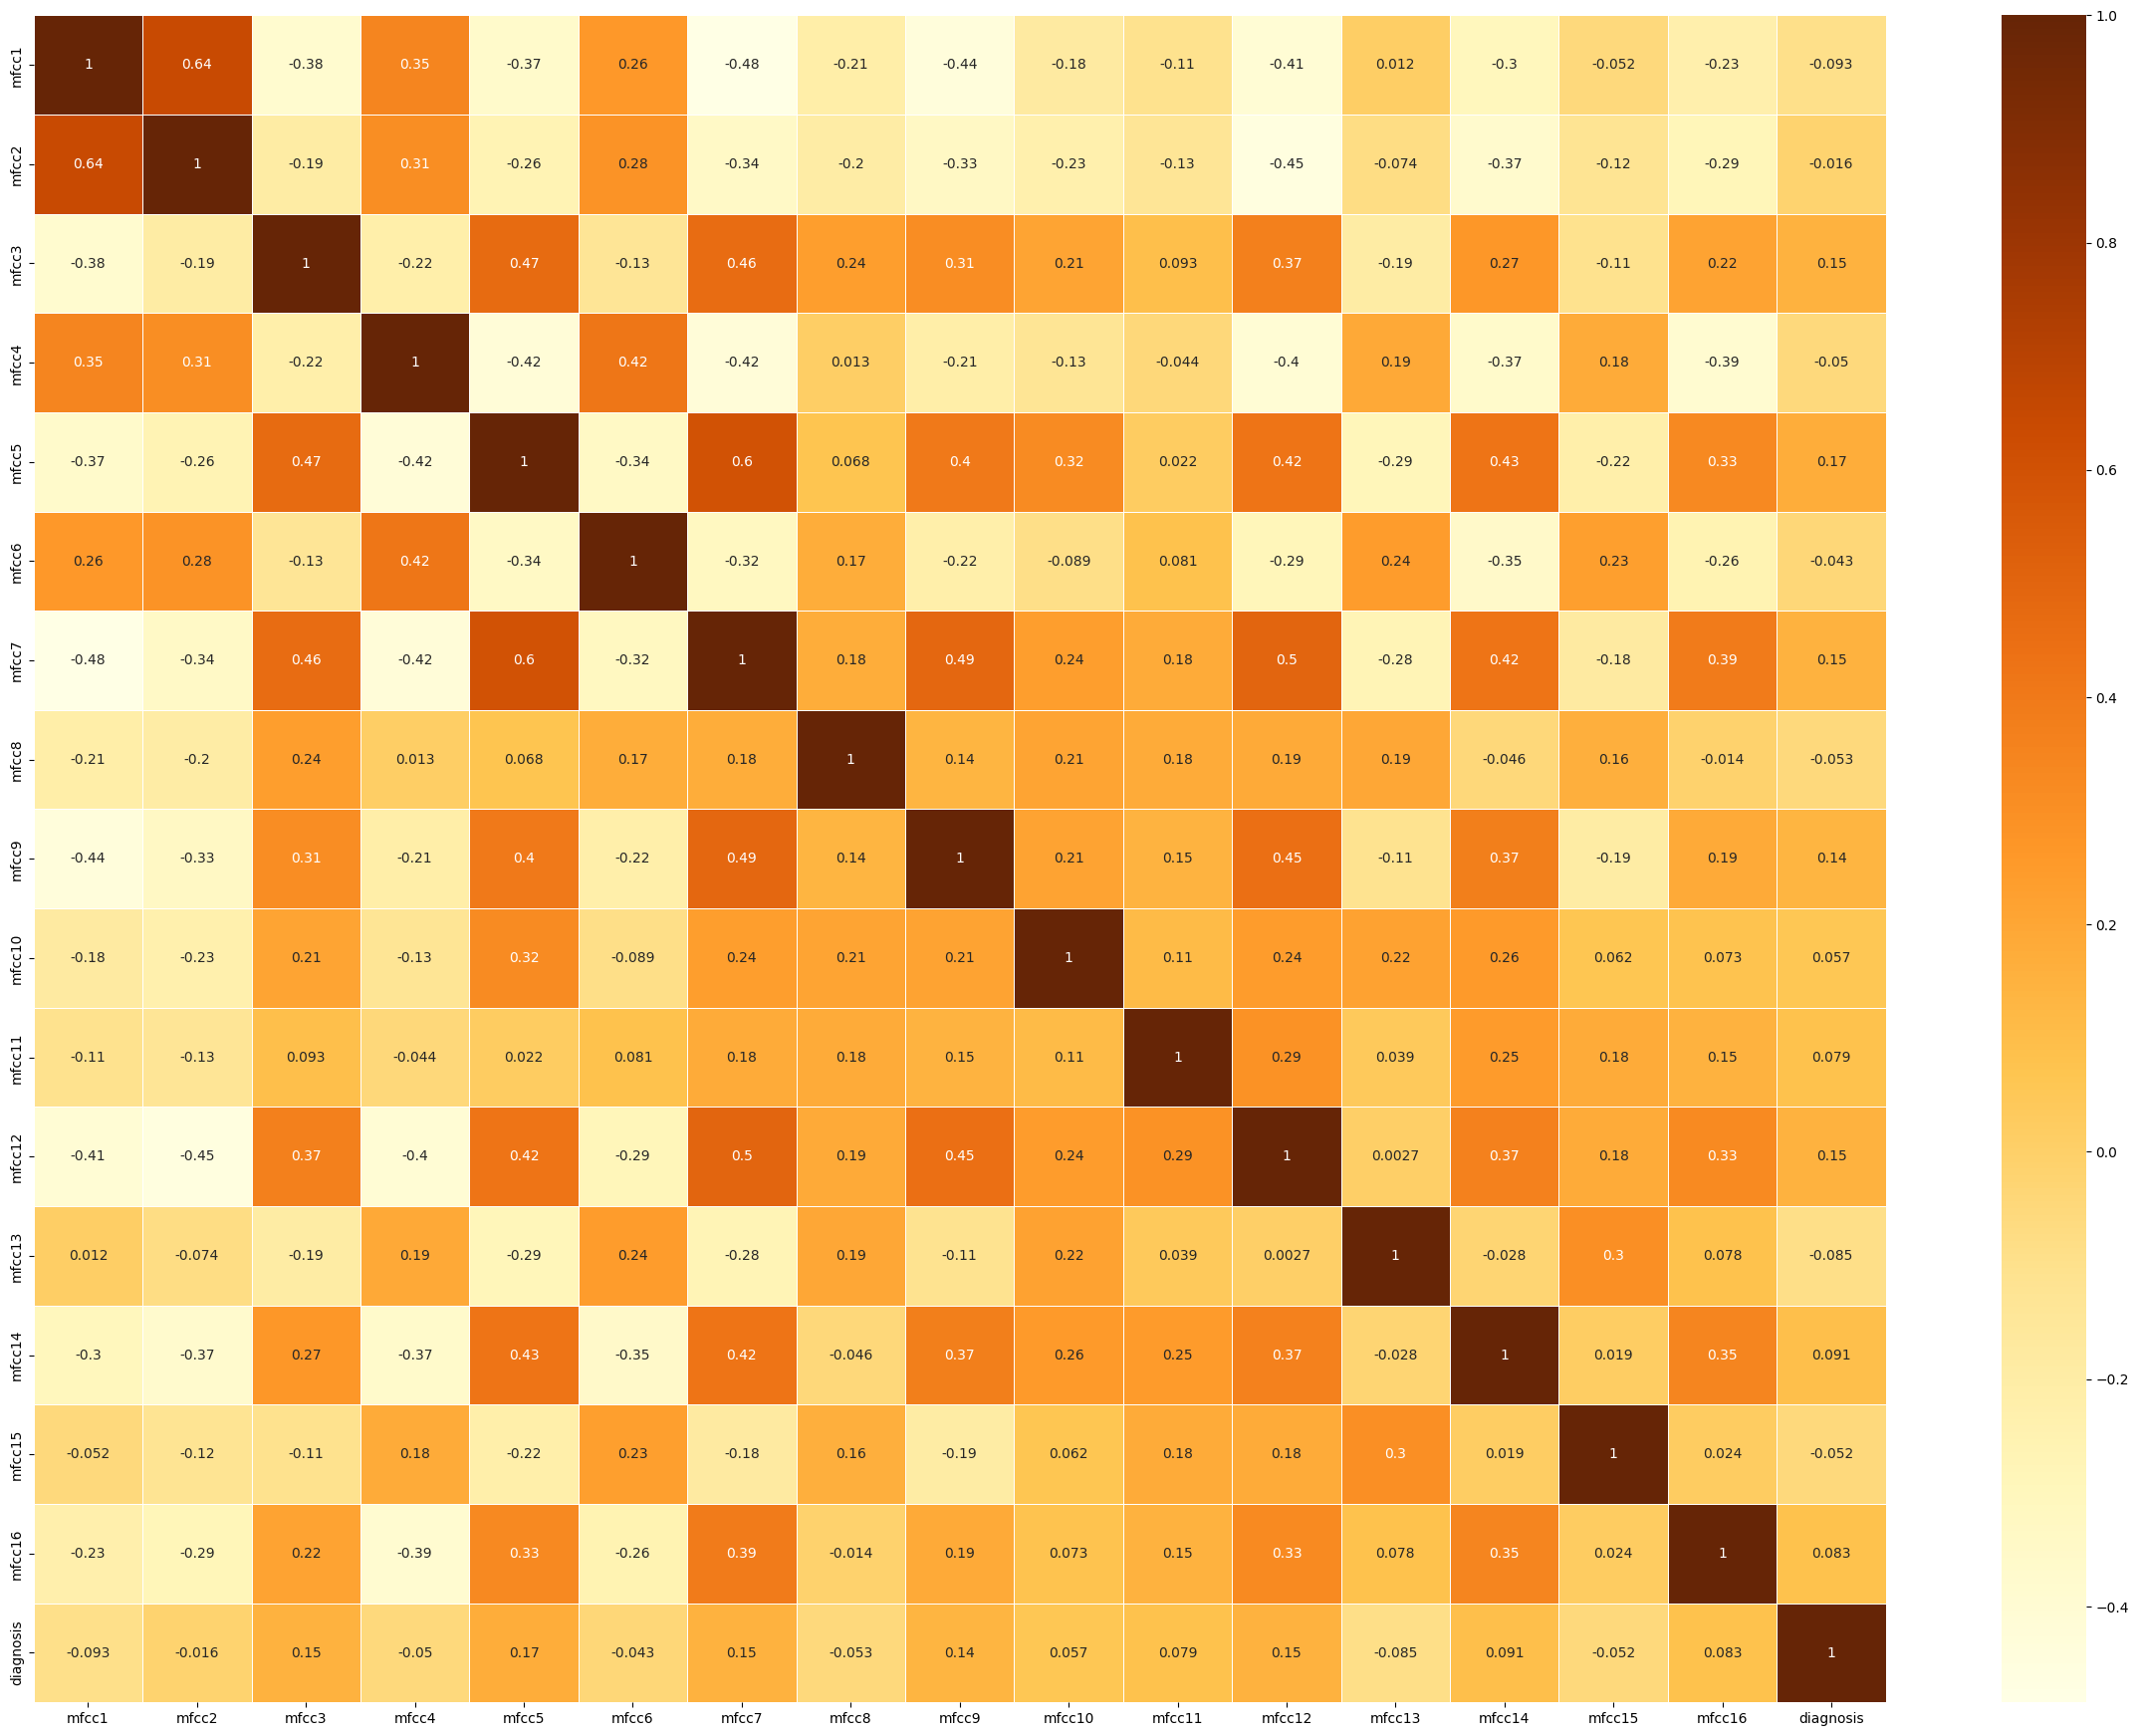

In [29]:
import seaborn as sns
plt.figure(figsize = (30,22))
sns.heatmap(data = extracted_features_df.corr(), cmap="YlOrBr", annot = True, linewidth = 0.5)

In [30]:
X = extracted_features_df.drop(["diagnosis"], axis=1)
y = extracted_features_df["diagnosis"]

In [31]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [32]:
X_train.shape

(375, 16)

In [33]:
X_test.shape

(161, 16)

In [34]:
y_train.shape

(375,)

In [35]:
y_test.shape

(161,)

In [40]:
df_train = X_train.assign(diagnosis = y_train)
df_train.head()

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,diagnosis
252,-415.399994,29.270653,-11.649802,-6.460536,-4.960821,2.271677,-13.254751,-2.905183,-3.684471,-3.004395,-0.618475,-3.041473,-1.552663,2.105770,-0.234457,3.297272,2
124,-560.473938,31.410089,-20.265539,18.044207,-0.827503,10.692424,-2.133670,-0.218966,0.036871,0.640432,1.306396,0.330796,2.148451,-3.449433,1.163451,-3.547902,2
154,-430.017120,56.420643,-5.086460,10.270359,-5.476517,1.783419,-7.789073,-3.949866,-3.956756,-1.880651,-3.988552,-3.889005,2.497041,0.271941,-0.554606,-4.699206,2
386,-477.078033,32.721302,-25.908508,9.895742,-11.512649,-8.028059,-11.475798,-7.927103,-6.644646,-0.893267,-2.211443,-4.214468,3.703328,-1.431445,-0.627525,-1.693770,0
59,-349.576141,58.172531,-4.058333,1.515652,13.872476,10.389780,-0.914341,-1.833890,-16.613316,-1.595049,-3.703577,-7.196638,-1.613046,-2.995637,-3.648755,0.092999,0


In [41]:
df_test = X_test.assign(diagnosis = y_test)
df_test.head()

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,diagnosis
172,-403.759857,34.250668,-11.704298,8.473534,-9.027993,14.594327,-1.134209,-6.693362,-15.689639,-5.186204,-4.028252,-9.274445,-9.983465,6.478982,-5.352130,0.375203,1
465,-477.141113,29.358572,-17.003649,19.056028,-16.627508,6.034992,-18.553747,-1.420731,-6.804400,-0.204376,-4.592718,-3.907645,-0.384192,-9.915396,-1.815331,-5.663036,1
196,-447.609375,53.280190,1.408660,15.934964,-9.807816,1.910010,-5.531781,-8.757924,-6.106266,-7.317298,-5.406588,-6.941155,-2.764432,-3.422742,-1.492173,-2.617544,1
415,-529.436707,10.830865,-6.329929,3.443882,-3.078114,0.345905,-3.508756,-1.862524,-2.215323,-1.035231,0.054796,-1.913019,0.338471,-0.880688,0.313551,-0.281751,1
532,-402.803040,38.114639,-8.293879,13.660946,-16.565271,-0.299556,-10.985296,2.700624,-15.857039,-1.956247,1.459677,-4.333518,1.459953,-4.116962,4.151083,-2.959206,0


In [38]:
!pip install --pre pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.1/72.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 87.4 MB/s eta 0:0

In [42]:
from pycaret.classification import *

s = setup(df_train, target = 'diagnosis')

,Description,Value
0,Session id,1008
1,Target,diagnosis
2,Target type,Multiclass
3,Original data shape,"(375, 17)"
4,Transformed data shape,"(375, 17)"
5,Transformed train set shape,"(262, 17)"
6,Transformed test set shape,"(113, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [43]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.4161,0.1689,0.4161,0.4023,0.3962,0.1434,0.1468,0.5120
ridge,Ridge Classifier,0.3972,0.0000,0.3972,0.3739,0.3674,0.1166,0.1216,0.0460
gbc,Gradient Boosting Classifier,0.3859,0.1657,0.3859,0.3866,0.3772,0.1097,0.1136,1.9970
lda,Linear Discriminant Analysis,0.3698,0.1661,0.3698,0.3584,0.3553,0.0891,0.0915,0.0640
et,Extra Trees Classifier,0.3664,0.1685,0.3664,0.3505,0.3473,0.0741,0.0737,0.4060
nb,Naive Bayes,0.3628,0.1557,0.3628,0.3758,0.3536,0.0753,0.0791,0.0560
lr,Logistic Regression,0.3585,0.1659,0.3585,0.3583,0.3481,0.0818,0.0835,0.9710
lightgbm,Light Gradient Boosting Machine,0.3553,0.1483,0.3553,0.3452,0.3430,0.0607,0.0598,0.4420
ada,Ada Boost Classifier,0.3550,0.1620,0.3550,0.3385,0.3164,0.0759,0.0912,0.4490
knn,K Neighbors Classifier,0.3440,0.1323,0.3440,0.3203,0.3119,0.0395,0.0410,0.0590


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [44]:
finalize_model(best)

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['mfcc1', 'mfcc2', 'mfcc3', 'mfcc4',
                                             'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8',
                                             'mfcc9', 'mfcc10', 'mfcc11',
                                             'mfcc12', 'mfcc13', 'mfcc14',
                                             'mfcc15', 'mfcc16'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=Fals...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=1008,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [45]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [46]:
predict_model(best, df_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.4224,0.5749,0.4224,0.4113,0.4054,0.1514,0.1555


,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,diagnosis,prediction_label,prediction_score
172,-403.759857,34.250668,-11.704298,8.473534,-9.027993,14.594327,-1.134209,-6.693362,-15.689639,-5.186204,-4.028252,-9.274445,-9.983465,6.478982,-5.352130,0.375203,1,1,0.39
465,-477.141113,29.358572,-17.003649,19.056028,-16.627508,6.034992,-18.553747,-1.420731,-6.804400,-0.204376,-4.592718,-3.907645,-0.384192,-9.915396,-1.815331,-5.663036,1,0,0.52
196,-447.609375,53.280190,1.408660,15.934964,-9.807816,1.910010,-5.531781,-8.757924,-6.106266,-7.317298,-5.406588,-6.941155,-2.764432,-3.422742,-1.492173,-2.617544,1,1,0.41
415,-529.436707,10.830865,-6.329929,3.443882,-3.078114,0.345905,-3.508756,-1.862524,-2.215323,-1.035231,0.054796,-1.913019,0.338471,-0.880688,0.313551,-0.281751,1,2,0.58
532,-402.803040,38.114639,-8.293879,13.660946,-16.565271,-0.299556,-10.985296,2.700624,-15.857039,-1.956247,1.459677,-4.333518,1.459953,-4.116962,4.151083,-2.959206,0,2,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,-445.761108,52.307007,-22.421755,6.451394,-10.173795,1.793135,-7.802383,-6.877166,-3.914840,2.406156,-4.286643,-1.664746,3.397284,-5.781911,-0.929476,-1.749300,1,0,0.49
436,-439.078857,20.099936,-23.827221,14.961610,-11.809814,12.891389,-6.149173,2.404001,-3.338630,-3.522596,2.068316,-3.175086,1.580822,-3.053533,1.521768,-3.950638,1,0,0.38
361,-484.023712,27.745140,-8.006779,3.831342,-3.390353,4.104573,-1.286748,-3.074018,-3.285806,-0.485382,0.186005,-4.033480,2.299305,-1.923268,-2.996637,0.481163,2,2,0.49
301,-545.855896,23.740753,-13.511986,0.817245,-6.787235,2.116109,-2.474605,-1.366171,-1.755199,-4.765501,-2.082775,-0.824352,-0.072023,-1.596095,0.163486,-1.267838,1,2,0.36


In [ ]:
# BEST MODEL = RANDOM FOREST F1 SCORE = 40.54 % taken since DATA IS NOT BALANCED FOR ALL THE LABEL CATEGORIES

In [47]:
X

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16
0,-452.610626,22.148582,-26.667784,14.294965,-11.275042,-4.616519,-9.429002,-5.581970,-4.823736,-1.983881,-3.111674,-2.568714,2.865866,-2.826376,-0.517783,-1.794053
1,-490.407593,46.116169,-10.762878,1.874184,2.817583,0.592210,-6.708392,-6.129557,-3.375265,-3.202446,-2.241224,-3.299662,-0.895146,-3.855475,-3.636161,-2.962979
2,-372.411011,70.084167,-6.788613,15.035032,-22.363907,30.576426,-29.808424,-7.844227,-10.131979,-9.631707,-12.262403,-9.298244,0.367706,-8.707373,-2.383633,-10.243588
3,-488.158783,17.670715,-1.707415,4.580669,-12.120718,2.679798,-3.528488,-1.293560,-1.336645,-2.632636,-2.568296,-3.983283,-1.052278,-1.877194,0.617954,-2.027632
4,-464.470673,33.050476,-13.767201,-2.279912,-5.500866,1.203839,-3.512835,-5.580782,0.718663,1.615429,-1.038447,-1.823261,0.998890,-4.956551,-2.084817,1.051466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,-354.408752,81.297447,6.758569,12.959607,-18.884579,17.487583,-20.863411,-7.496131,-8.061003,-5.605628,5.636711,-8.283680,-7.466475,-3.091458,2.415343,-6.163981
532,-402.803040,38.114639,-8.293879,13.660946,-16.565271,-0.299556,-10.985296,2.700624,-15.857039,-1.956247,1.459677,-4.333518,1.459953,-4.116962,4.151083,-2.959206
533,-454.446991,48.200497,8.506755,-2.231251,-10.038096,-5.274790,-14.275656,-12.535813,-9.707957,-7.859199,-13.065873,-5.256585,-6.131659,-6.516151,-7.514828,-4.362307
534,-606.841248,15.576273,5.150735,4.595417,1.235464,-1.233381,0.328511,0.008534,-3.731133,-1.617394,-0.793569,-2.303112,-0.200474,-3.242699,-1.102964,-0.950693


In [48]:
y

0      2
1      2
2      0
3      2
4      2
      ..
531    2
532    0
533    1
534    1
535    1
Name: diagnosis, Length: 536, dtype: int64

In [49]:
### Label Encoding
y = np.array(pd.get_dummies(y))

In [50]:
y.shape

(536, 5)

In [51]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [52]:
from sklearn.model_selection import train_test_split
X_val,X_test,y_val,y_test=train_test_split(X_test,y_test,test_size=0.5,random_state=0)

In [53]:
# Define the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

### No of classes
num_labels = y.shape[1]

model=Sequential()
#First Layer
model.add(Dense(1024,input_shape=(16,)))
model.add(Activation('relu'))
model.add(Dropout(0.50))

#Second Layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.30))

#Third Layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.25))

#Fourth Layer
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))

#Final Layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              17408     
                                                                 
 activation (Activation)     (None, 1024)              0         
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               1

In [55]:
# Compile the model with loss and optimizer
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [56]:
# Train the model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 200
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='each_expert_diagnosis_label_ann.hdf5', verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
12/12 [==============================] - ETA: 0s - loss: 16.5535 - accuracy: 0.2960
Epoch 1: val_loss improved from inf to 3.93440, saving model to each_expert_diagnosis_label_ann.hdf5
12/12 [==============================] - 2s 47ms/step - loss: 16.5535 - accuracy: 0.2960 - val_loss: 3.9344 - val_accuracy: 0.4125
Epoch 2/200
 9/12 [=====================>........] - ETA: 0s - loss: 9.3095 - accuracy: 0.2604 
Epoch 2: val_loss improved from 3.93440 to 2.28786, saving model to each_expert_diagnosis_label_ann.hdf5
12/12 [==============================] - 0s 23ms/step - loss: 8.9899 - accuracy: 0.2480 - val_loss: 2.2879 - val_accuracy: 0.4125
Epoch 3/200
 9/12 [=====================>........] - ETA: 0s - loss: 5.6774 - accuracy: 0.2431
Epoch 3: val_loss improved from 2.28786 to 1.47318, saving model to each_expert_diagnosis_label_ann.hdf5
12/12 [==============================] - 0s 22ms/step - loss: 5.4994 - accuracy: 0.2400 - val_loss: 1.4732 - val_accuracy: 0.3875
Epoch 4/200

In [57]:
# Check accuracy
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.43209877610206604


In [59]:
model.predict(X_test)

3/3 [==============================] - 0s 15ms/step


array([[2.58071363e-01, 3.20341200e-01, 3.87032956e-01, 2.14970130e-02,
        1.30573874e-02],
       [5.51145732e-01, 2.23647326e-01, 2.23094106e-01, 1.99486897e-03,
        1.17952739e-04],
       [2.80558228e-01, 3.09209943e-01, 3.38713080e-01, 4.14183363e-02,
        3.01004127e-02],
       [4.64694768e-01, 2.76074558e-01, 2.34837040e-01, 1.91371422e-02,
        5.25656482e-03],
       [2.73137271e-01, 3.13635409e-01, 3.61304522e-01, 3.10554281e-02,
        2.08673012e-02],
       [3.51693213e-01, 2.92004168e-01, 2.86902606e-01, 4.28291112e-02,
        2.65709665e-02],
       [3.23380202e-01, 2.97457546e-01, 3.11295509e-01, 4.06732969e-02,
        2.71934532e-02],
       [3.91947776e-01, 2.86002696e-01, 2.66973525e-01, 3.67744304e-02,
        1.83016565e-02],
       [4.35052723e-01, 2.46714711e-01, 3.13930005e-01, 3.79357114e-03,
        5.09041362e-04],
       [2.80703634e-01, 3.08664083e-01, 3.45327407e-01, 3.81366350e-02,
        2.71682683e-02],
       [2.81405389e-01, 3.1118

In [ ]:
# MODEL ANN WITH ACCURACY = 43.20 % not gone into F1 score since accuracy itself isn't much high